In [15]:
import os
import pandas as pd
import re
import seaborn as sns

In [16]:
sns.set(rc={'figure.figsize':(25,16)})
sns.set_style("ticks",{'axes.grid' : True})

### считываем файлы

In [17]:
dt={}
for file in os.listdir():
    with open(file, 'r', encoding="utf-8") as f:
        for line in f:
            for i in range(1,23):
                if f"chr{i}.vcf.gz" in line:
                    id = file + "," + str(i)
                    dt[id]=""
            
            if "сек" in line:
                 dt[id] =  re.sub("[^0-9.]", "", line)

dt["beagle_ref_89.txt,2"]='2107.38'
dt['shapeit_ref89.txt,2']='1595.59'
dt

{'beagle_20.txt,21': '31.78',
 'beagle_20.txt,20': '34.88',
 'beagle_20.txt,19': '42.78',
 'beagle_20.txt,14': '45.17',
 'beagle_20.txt,17': '47.73',
 'beagle_20.txt,15': '48.63',
 'beagle_20.txt,18': '50.25',
 'beagle_20.txt,16': '51.60',
 'beagle_20.txt,13': '52.44',
 'beagle_20.txt,10': '60.89',
 'beagle_20.txt,5': '63.58',
 'beagle_20.txt,9': '64.38',
 'beagle_20.txt,12': '65.16',
 'beagle_20.txt,8': '65.70',
 'beagle_20.txt,11': '71.51',
 'beagle_20.txt,7': '76.25',
 'beagle_20.txt,6': '83.01',
 'beagle_20.txt,4': '84.78',
 'beagle_20.txt,1': '85.59',
 'beagle_20.txt,3': '87.58',
 'beagle_20.txt,2': '91.91',
 'beagle_300.txt,21': '128.88',
 'beagle_300.txt,20': '154.96',
 'beagle_300.txt,17': '173.49',
 'beagle_300.txt,16': '175.36',
 'beagle_300.txt,18': '183.89',
 'beagle_300.txt,13': '189.09',
 'beagle_300.txt,19': '211.11',
 'beagle_300.txt,15': '221.09',
 'beagle_300.txt,14': '251.06',
 'beagle_300.txt,11': '279.06',
 'beagle_300.txt,9': '293.42',
 'beagle_300.txt,7': '308.00

In [18]:
df = pd.DataFrame(dt.items(), columns=['names_with_chr', 'time'])
df[["name","chr"]]=df['names_with_chr'].str.split(",", expand=True)
df['time']=df['time'].astype(float)
df

,names_with_chr,time,name,chr
0,"beagle_20.txt,21",31.78,beagle_20.txt,21
1,"beagle_20.txt,20",34.88,beagle_20.txt,20
2,"beagle_20.txt,19",42.78,beagle_20.txt,19
3,"beagle_20.txt,14",45.17,beagle_20.txt,14
4,"beagle_20.txt,17",47.73,beagle_20.txt,17
...,...,...,...,...
625,"shapeit_ref89.txt,6",5878.41,shapeit_ref89.txt,6
626,"shapeit_ref89.txt,4",6072.23,shapeit_ref89.txt,4
627,"shapeit_ref89.txt,3",6119.93,shapeit_ref89.txt,3
628,"shapeit_ref89.txt,1",6524.02,shapeit_ref89.txt,1


### зависимость времени от количества сэмплов в образцах

In [19]:
nt_sum = df.groupby(['name']).sum().reset_index()

C:\Users\melib\AppData\Local\Temp\ipykernel_20696\2319607160.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  nt_sum1['point'] = nt_sum1['point'].str.replace(r'\D', '') #удалить буквы
C:\Users\melib\AppData\Local\Temp\ipykernel_20696\2319607160.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  nt_sum1['name'] = nt_sum1['name'].str.replace(r'\d+', '') #удалить цифры


<AxesSubplot:xlabel='point', ylabel='time'>

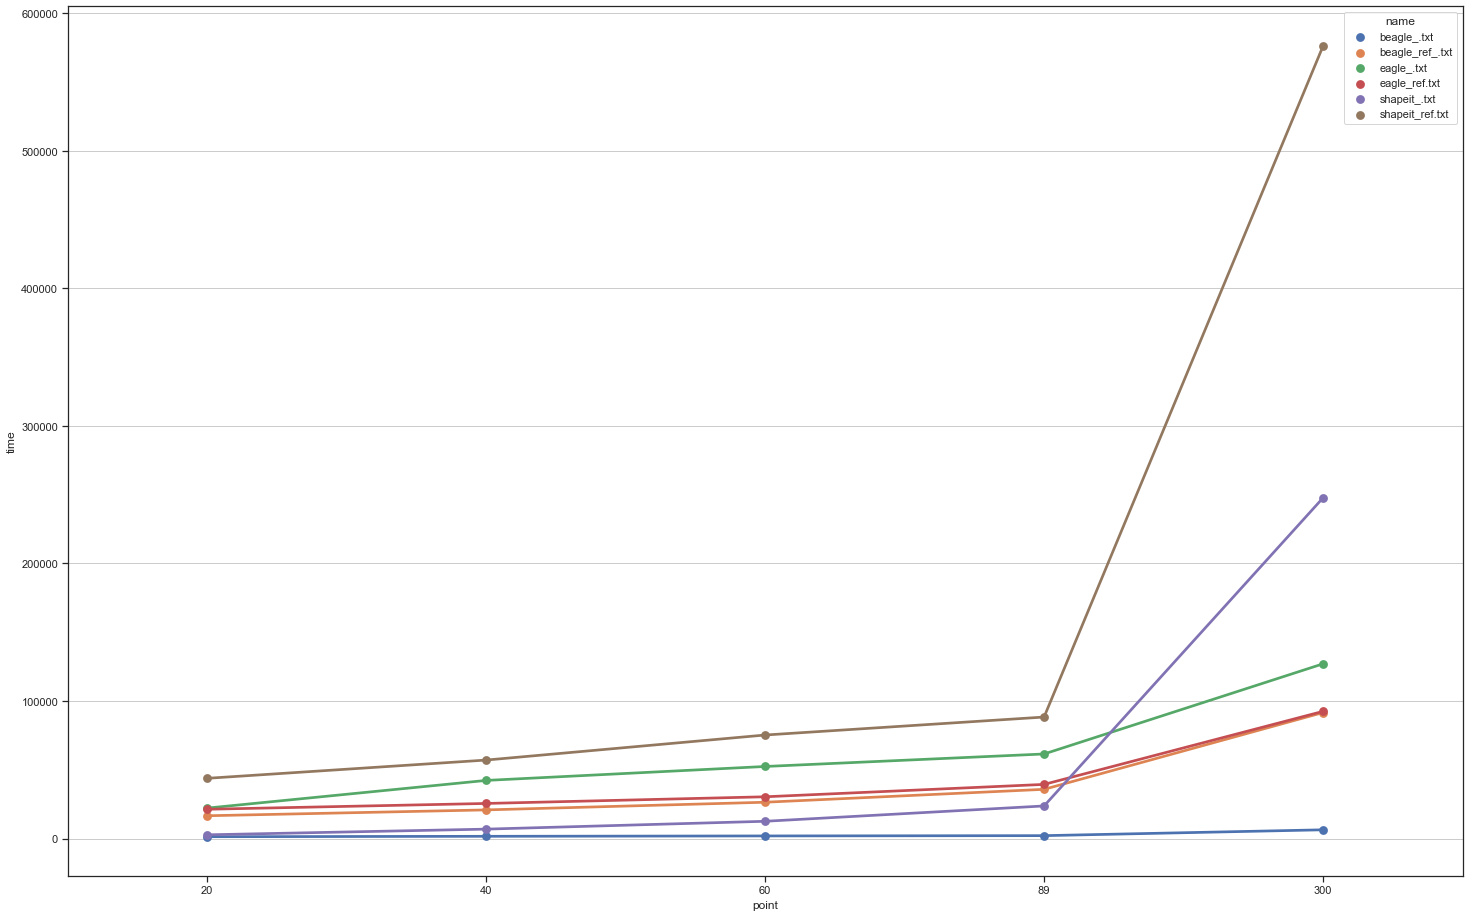

In [20]:
nt_without_none = nt_sum.dropna()
nt_sum1 = nt_without_none.groupby("name").sum().reset_index()
nt_sum1[["name1","point"]]=nt_sum1['name'].str.split(r'_', 1, expand=True)
nt_sum1['point'] = nt_sum1['point'].str.replace(r'\D', '') #удалить буквы
nt_sum1['point'] = nt_sum1['point'].astype(int)
nt_sum1['name'] = nt_sum1['name'].str.replace(r'\d+', '') #удалить цифры
sns.pointplot(data=nt_sum1, x="point", y="time", hue="name")


### Зависимость времени по хромосомам 

In [21]:
nt1=pd.pivot_table(df,columns=['name'], index=['chr']).reset_index()
nt1.columns = nt1.columns.droplevel(0)
nt1

name,,beagle_20.txt,beagle_300.txt,beagle_40.txt,beagle_60.txt,beagle_89.txt,beagle_ref_20.txt,beagle_ref_300.txt,beagle_ref_40.txt,beagle_ref_60.txt,...,shapeit_20.txt,shapeit_300.txt,shapeit_40.txt,shapeit_60.txt,shapeit_89.txt,shapeit_ref20.txt,shapeit_ref300.txt,shapeit_ref40.txt,shapeit_ref60.txt,shapeit_ref89.txt
0,1,85.59,518.91,110.18,141.05,130.59,1076.65,7873.92,1305.37,1581.86,...,196.00,17059.30,503.12,907.81,1585.10,2965.40,36089.44,4007.25,5361.18,6524.02
1,10,60.89,375.01,83.21,97.28,94.68,840.43,4971.61,968.91,1365.70,...,163.71,12580.74,344.96,739.75,1290.23,2193.40,30798.57,2895.61,3910.82,4796.52
2,11,71.51,279.06,77.40,99.54,110.30,859.78,4735.96,1071.32,1315.69,...,115.80,13225.67,430.34,680.45,1294.47,2209.42,31051.21,2798.11,3863.98,4692.47
3,12,65.16,332.76,83.87,76.68,110.96,855.51,4414.73,1067.15,1354.54,...,120.46,12266.76,393.87,688.98,1143.59,2139.68,28764.16,2760.49,3653.64,4473.02
4,13,52.44,189.09,72.32,65.74,79.86,716.15,3268.81,925.37,1221.44,...,122.19,9988.08,306.66,414.08,961.56,1776.26,23770.80,2231.25,2873.94,3610.11
5,14,45.17,251.06,65.82,66.63,83.46,643.77,3265.37,836.95,1049.92,...,105.10,8987.93,234.88,394.72,888.83,1650.72,22591.03,2137.65,2680.91,3444.48
6,15,48.63,221.09,65.26,70.14,72.08,625.76,2874.47,845.97,978.92,...,74.51,8309.64,226.60,337.23,768.97,1584.62,21109.90,2014.98,2460.75,3242.02
7,16,51.60,175.36,61.11,75.46,83.75,657.06,2870.65,866.01,1149.71,...,89.86,8927.10,285.07,374.54,830.62,1701.10,22100.25,2107.14,2690.35,3404.06
8,17,47.73,173.49,56.61,72.16,77.61,577.30,2598.58,832.31,1068.86,...,73.86,8495.25,203.53,460.99,867.58,1572.33,20958.95,1966.98,2455.83,3165.63
9,18,50.25,183.89,59.18,64.47,78.51,606.20,3046.63,824.38,1049.72,...,99.05,7839.83,144.48,436.92,734.82,1513.41,19896.60,1907.82,2363.48,3107.72


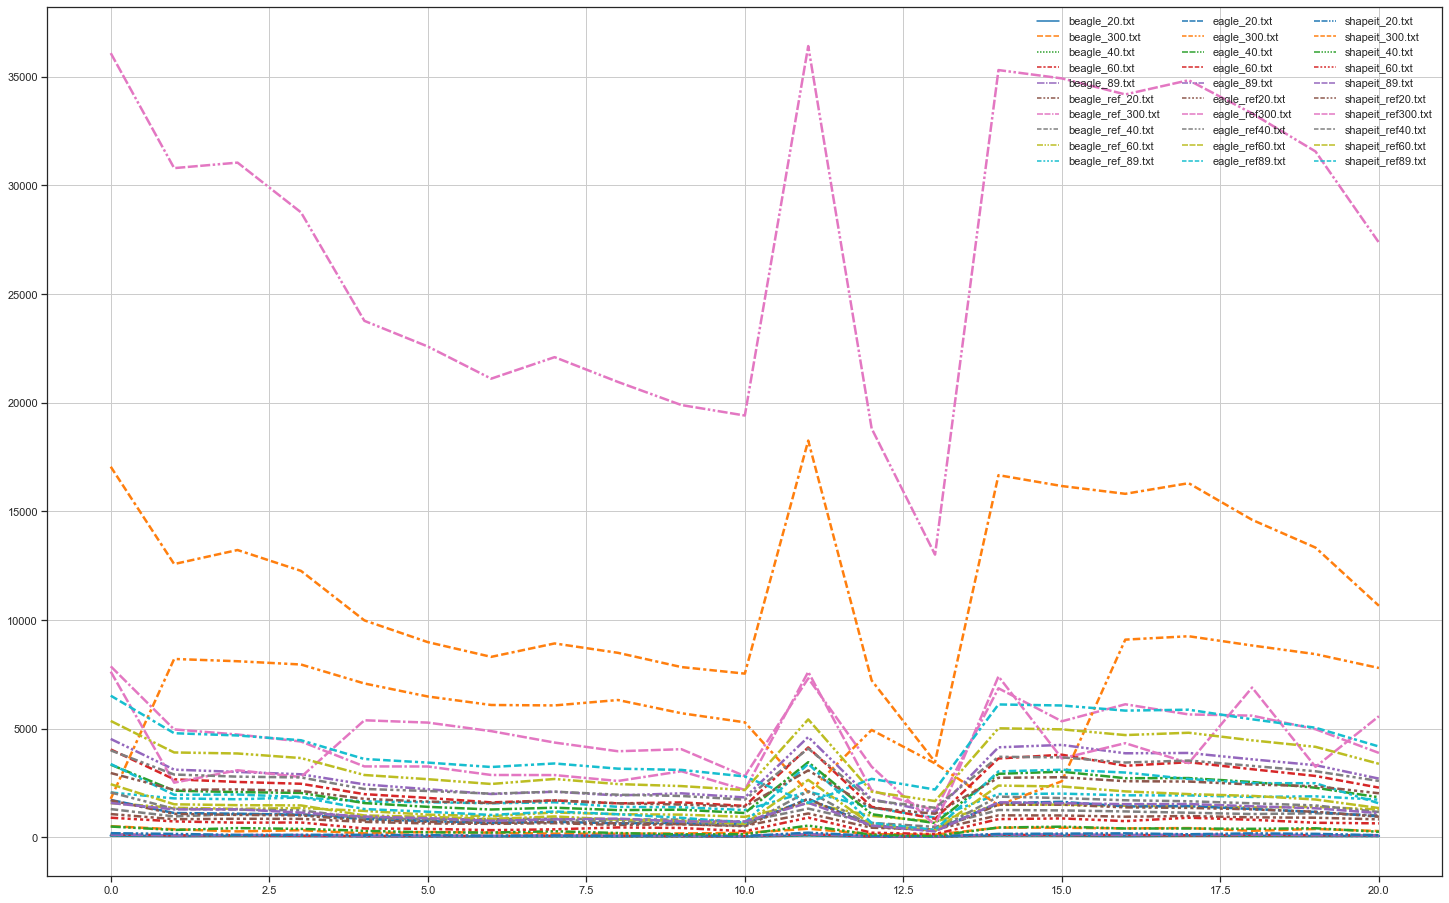

In [22]:
ax = sns.lineplot(data=nt1, palette="tab10", linewidth=2.5)
sns.move_legend(ax, "upper right", ncol=3, title=None, frameon=False)

Раскраска по методам

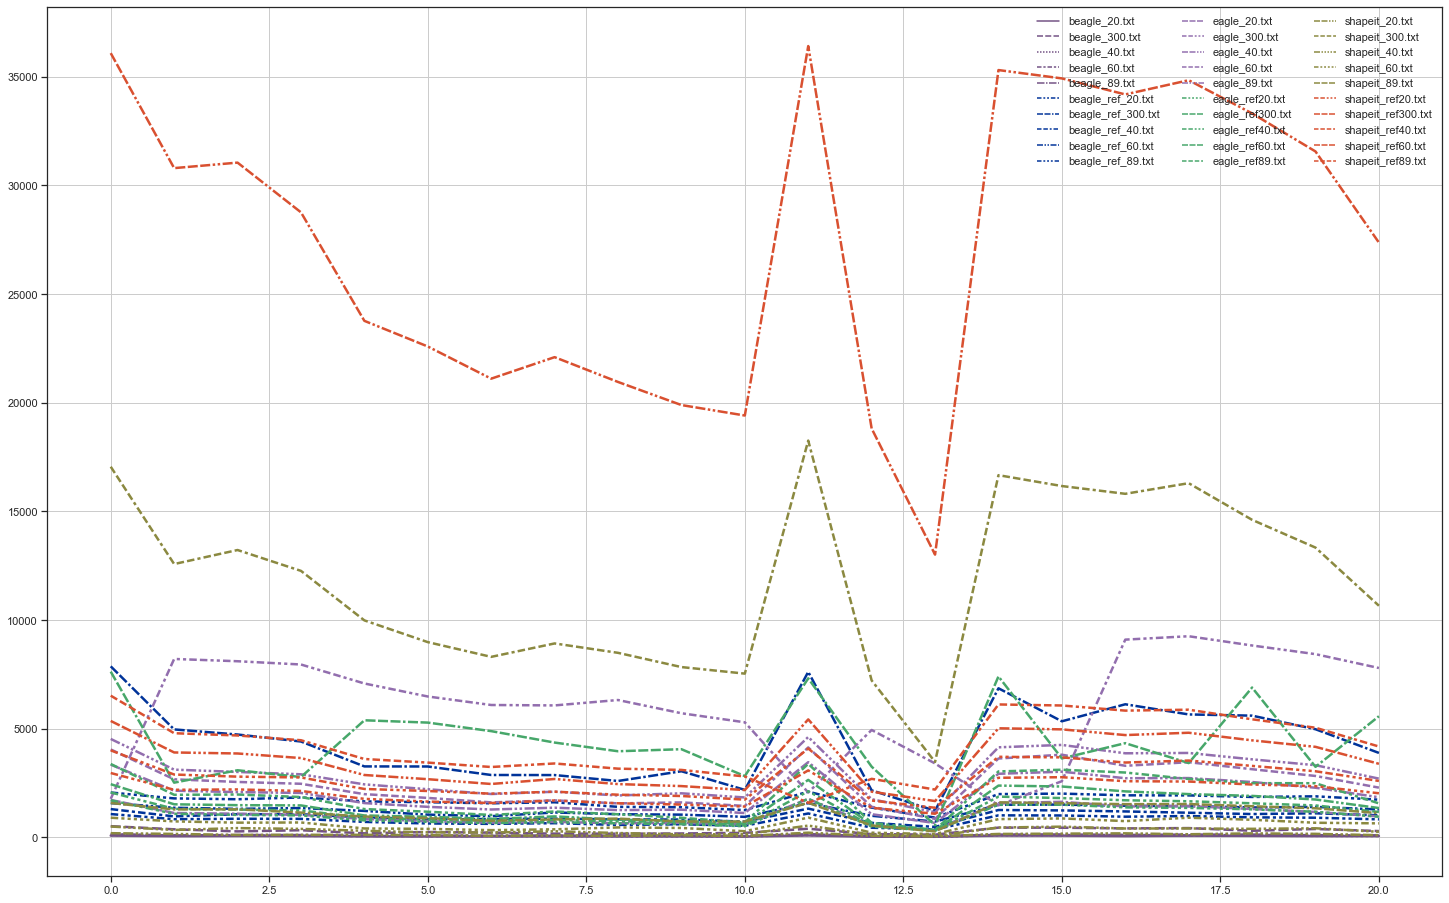

In [24]:
ax = sns.lineplot(data=nt1, palette=[
'#735184', '#735184', '#735184', '#735184','#735184',
'#003399', '#003399', '#003399', '#003399', '#003399', 
'#926eae', '#926eae', '#926eae', '#926eae', '#926eae',
'#47a76a', '#47a76a', '#47a76a', '#47a76a', '#47a76a',
'#8b8940', '#8b8940', '#8b8940', '#8b8940', '#8b8940', 
'#d95030', '#d95030', '#d95030', '#d95030', '#d95030'], linewidth=2.5)
sns.move_legend(ax, "upper right", ncol=3, title=None, frameon=False)

Раскраска по количеству образцов

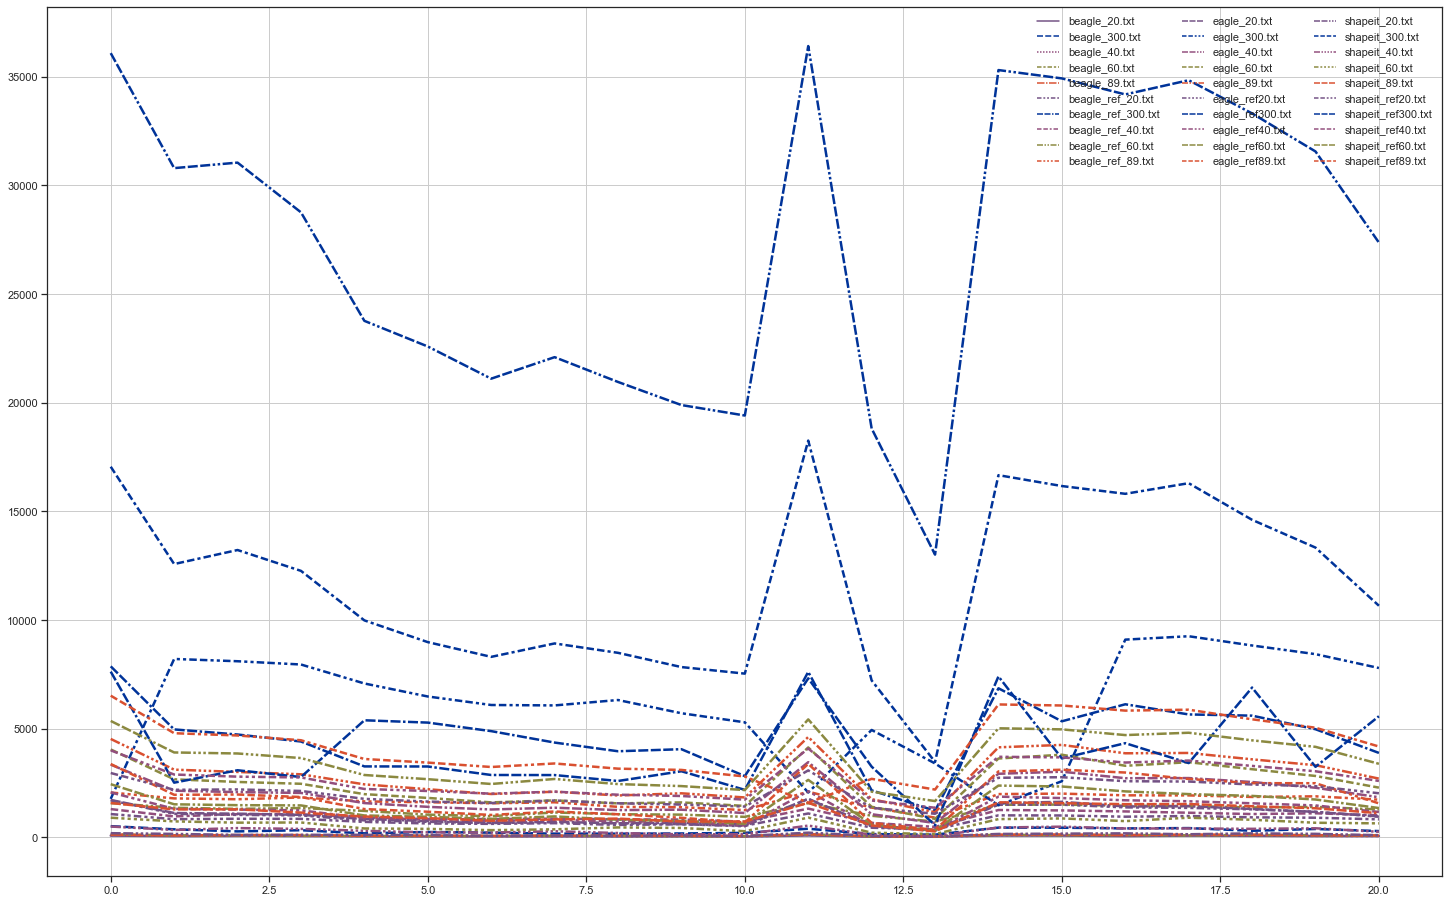

In [25]:
ax = sns.lineplot(data=nt1, palette=[
'#735184', '#003399', '#924e7d', '#8b8940','#d95030',
'#735184', '#003399', '#924e7d', '#8b8940', '#d95030',
'#735184', '#003399', '#924e7d', '#8b8940', '#d95030', 
'#735184', '#003399', '#924e7d', '#8b8940', '#d95030', 
'#735184', '#003399', '#924e7d', '#8b8940', '#d95030', 
'#735184', '#003399', '#924e7d', '#8b8940', '#d95030'], linewidth=2.5)
sns.move_legend(ax, "upper right", ncol=3, title=None, frameon=False)

### Элементы снейкмейка

In [ ]:
rule phasing_38_eagle_ref89:
    input:
        vcf_gz = os.path.join(config['path_to_output3'], "{chr}.vcf.gz"),
        index = os.path.join(config['path_to_output3'], "{chr}.vcf.gz.tbi"),
        ref_38 = os.path.join(config['path_to_panel'], "1kGP_high_coverage_Illumina.{chr}.filtered.SNV_INDEL_SV_phased_panel.vcf.gz"),
        map_38= os.path.join(config['path_to_gmaps_of_eagle'],"genetic_map_hg38_withX.txt.gz")
    output:
        prephased = os.path.join(config['path_to_vcf3'],"{chr}", 'prephased',"prephased_eagle_ref{chr}.vcf.gz"),
        index = os.path.join(config['path_to_vcf3'],"{chr}", 'prephased',"prephased_eagle_ref{chr}.vcf.gz.tbi")
       # log = os.path.join(config['path_to_output'],"{chr}", 'prephased', "merged.hg38.{chr}.prephased_beagle_log.log")
    params:
        prephased = os.path.join(config['path_to_vcf0'],"{chr}", 'prephased',"prephased_eagle_ref{chr}")
    shell:
        """
            /usr/bin/time -a -f "Информация о команде:\n%C\nЗагруженность CPU: %P\nВремя выполнения: %e сек" -o /home/ivanova_ao/ref/eagle_ref89.txt \
             eagle \
               --vcfTarget={input.vcf_gz} \
               --vcfRef={input.ref_38} \
               --geneticMapFile={input.map_38} \
               --chrom={wildcards.chr} \
               --outPrefix={params.prephased} \
               --numThreads=40
            tabix -p vcf {output.prephased}
            """